In [9]:
from pylab import *

from glob import glob
from os.path import splitext,join
from glob import glob
from matplotlib.cm import *
%matplotlib inline
from scipy.optimize import curve_fit

In [15]:
data = {'0.1':[None],'-0.1':[None],
        '1.0':[None,None,None],'-1.0':[None,None,None],
        '0.2':[None,None,None,None,None,None],'-0.2':[None,None,None,None,None,None]}

plus100,minus100 = [],[]
plus200,minus200 = [],[]
plus1000,minus1000 = [],[]
allmV = []

for i,file_path in enumerate(glob('./md-electric-field-data/*/*/*q.out')):
    data = genfromtxt(file_path,dtype=float)
    
    x,y,z,w = data.T
    
    if i < 6 :
        y /= 0.2
        z /= 0.2
        w /= 0.2
        
        data = array([x,y,z,w]).T
        minus200 += [data]

    elif i < 12 :
        y /= 0.2
        z /= 0.2
        w /= 0.2

        data = array([x,y,z,w]).T
        plus200 += [data]
    elif i == 12 :
        y /= 0.1
        z /= 0.1
        w /= 0.1
        
        data = array([x,y,z,w]).T
        plus100 += [data]
    elif i == 13 :
        y /= 0.1
        z /= 0.1
        w /= 0.1

        data = array([x,y,z,w]).T
        minus100 += [data]
    elif i < 17 :
        minus1000 += [data]
    else :
        y /= 1.0
        z /= 1.0
        w /= 1.0

        plus1000 += [data]
        
    allmV += [data]
    
#     _,_,_,param,traj = file_path.split('/')
#     i = int(splitext(traj)[0][0])-1
    
#     if param[:param.index('-')] == 'plus': v = float(param[param.index('-')+1:-2])/1000
#     else : v = -float(param[param.index('-')+1:-2])/1000
  
    
#     data[str(v)][i] = frame,current,voltage,x


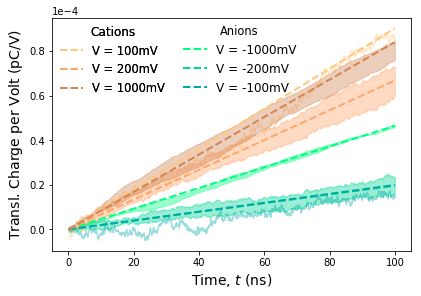

In [34]:
def func(x, a, b):
    return a * x + b
#figure(figsize=(4,3))
label = [ '-1000mV','-200mV','-100mV' ]
norm = [-1.0,-0.2,-0.1,0.1,0.2,1.0]
nline  = 3*[None]
pline  = 3*[None]
conductance={}
for j,datum in enumerate([minus1000,minus200,minus100]):
    i = j/6.0; i = 1-i

    x,_,_,y = mean(array(datum),axis=0).T
    _,_,_,dy = std(array(datum),axis=0).T
    
    #slope, intercept, r_value, p_value, std_err = linregress(x,y)
    if any(dy==zeros(len(dy))):
        sigma=ones(len(dy))
    else:
        sigma=dy
    popt, pcov = curve_fit(func, x, y,sigma=sigma)
    slope = popt[0]
    conductance[label[j]]={"neg":[slope,sqrt(pcov.diagonal())[0]],"pos": None}
    nline[j], = plot(x/1000,x*slope,"--",lw=2,color=winter(i),label='V = '+label[j])

    #plot(x,y,color=winter(i))
    fill_between(x/1000,y1=y+dy, y2=y-dy,alpha=0.4,color=winter(i))

    
    
label2=['100mV','200mV','1000mV']
for j,datum in enumerate([plus100,plus200,plus1000]):
    i = j/6.0; i = 1-i

    x,_,y,_ = mean(array(datum),axis=0).T
    _,_,dy,_ = std(array(datum),axis=0).T
    
    if any(dy==zeros(len(dy))):
        sigma=ones(len(dy))
    else:
        sigma=dy
    popt, pcov = curve_fit(func, x, y,sigma=sigma)
    slope = popt[0]
    conductance[label2[j]]={"pos":[slope,sqrt(pcov.diagonal())[0]],"neg": None}
    pline[j], = plot(x/1000,x*slope,"--",lw=2,color=copper(i),label='V = '+label2[j])

    #plot(x,y,color=winter(i))
    fill_between(x/1000,y1=y+dy, y2=y-dy,alpha=0.4,color=copper(i))
xlabel(r'Time, $t$ ($\mathrm{ns}$)',fontsize=5)
tight_layout()

box = gca().get_position()

#gca().set_position([box.x0, box.y0, box.width, box.height*0.6])
legend1 = legend(handles=nline,fontsize=12,loc=(0.35,0.65),frameon=False)
legend1.set_title('Anions',prop={'size':11.5})
gca().add_artist(legend1)

legend2 = legend(handles=pline,fontsize=11.5,loc=(0.01,0.65),frameon=False)
legend2.set_title('Cations',prop={'size':12})
gca().add_artist(legend2)


#axes[2].legend(array(roi3)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
ax=gca()    
ax.ticklabel_format(style="scientific",axis="y")
ax.yaxis.major.formatter.set_powerlimits((0,0)) 
xlabel(r'Time, $t$ ($\mathrm{ns}$)',fontsize=14)
ylabel(r'Transl. Charge per Volt ($\mathrm{pC}/ \mathrm{V})$',fontsize=14);
#ylim(-8e-5,2e-5);
savefig("going_opposite.pdf")

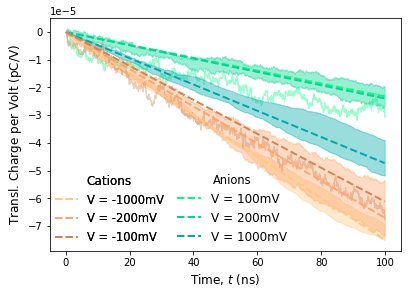

In [33]:
#figure(figsize=(4,3))
label = [ '100mV','200mV','1000mV' ]
norm = [-1.0,-0.2,-0.1,0.1,0.2,1.0]
nline  = 3*[None]
pline  = 3*[None]

for j,datum in enumerate([plus100,plus200,plus1000]):
    i = j/6.0; i = 1-i

    x,_,_,y = mean(array(datum),axis=0).T
    _,_,_,dy = std(array(datum),axis=0).T
    if any(dy==zeros(len(dy))):
        sigma=ones(len(dy))
    else:
        sigma=dy
    popt, pcov = curve_fit(func, x, y,sigma=sigma)
    slope = popt[0]
    conductance[label[j]].update({"neg":[slope,sqrt(pcov.diagonal())[0]]})
    nline[j], = plot(x/1000,x*slope,"--",lw=2,color=winter(i),label='V = '+label[j])

    #plot(x,y,color=winter(i))
    fill_between(x/1000,y1=y+dy, y2=y-dy,alpha=0.4,color=winter(i))

    
    
    
label2=['-1000mV','-200mV','-100mV'] 
for j,datum in enumerate([minus1000,minus200,minus100]):
    i = j/6.0; i = 1-i

    x,_,y,_ = mean(array(datum),axis=0).T
    _,_,dy,_ = std(array(datum),axis=0).T
    if any(dy==zeros(len(dy))):
        sigma=ones(len(dy))
    else:
        sigma=dy
    popt, pcov = curve_fit(func, x, y,sigma=sigma)
    slope = popt[0]
    conductance[label2[j]]={"pos":[slope,sqrt(pcov.diagonal())[0]]}
    pline[j], = plot(x/1000,x*slope,"--",lw=2,color=copper(i),label='V = '+label2[j])

    #plot(x,y,color=winter(i))
    fill_between(x/1000,y1=y+dy, y2=y-dy,alpha=0.4,color=copper(i))
xlabel(r'Time, $t$ ($\mathrm{ns}$)',fontsize=5)
tight_layout()

box = gca().get_position()


legend1 = legend(handles=nline,fontsize=12,loc=(0.35,0.01),frameon=False)
legend1.set_title('Anions',prop={'size':11.5})
gca().add_artist(legend1)

legend2 = legend(handles=pline,fontsize=11.5,loc=(0.00,0.01),frameon=False,numpoints=1)
legend2.set_title('Cations',prop={'size':12})
gca().add_artist(legend2)

ax=gca()    
ax.ticklabel_format(style="scientific",axis="y")
ax.yaxis.major.formatter.set_powerlimits((0,0))   
    
xlabel(r'Time, $t$ ($\mathrm{ns}$)',fontsize=12)
ylabel(r'Transl. Charge per Volt ($\mathrm{pC}/ \mathrm{V})$',fontsize=12);
#ylim(-8e-5,2e-5);
savefig("going_forward.pdf")

In [204]:
for key in conductance.keys():
    print(key)
    print(conductance[key])

-1000mV
{'pos': [8.4012506670681328e-10, 1.6656627322028139e-12]}
-200mV
{'pos': [6.6825430667575655e-10, 6.3548125719485064e-13]}
-100mV
{'pos': [9.0165479726987039e-10, 2.5230924361837748e-12]}
100mV
{'pos': [-6.1241053589501993e-10, 1.522751247280805e-12], 'neg': [1.9944713750079669e-10, 1.5425504579541942e-12]}
200mV
{'pos': [-6.7092591743227215e-10, 6.5047039456200528e-13], 'neg': [1.96232631766956e-10, 4.4907567761780199e-13]}
1000mV
{'pos': [-7.4994858894207726e-10, 3.6155295812952328e-13], 'neg': [4.650591044038198e-10, 1.3153569186552578e-13]}


In [199]:
conductance={}

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

<bound method Results.predict of <statsmodels.regression.linear_model.RegressionResults object at 0x7f475f9346d8>>

In [153]:
any(dy==zeros(len(dy)))

False

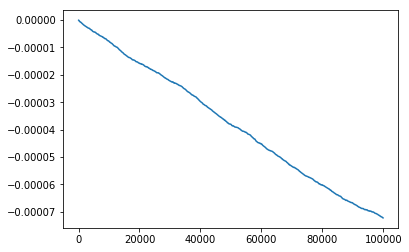

In [124]:
plot(x,y)

In [143]:
def func(x, a, b):
    return a * x + b
popt, pcov = curve_fit(func, x, y,sigma=dy)
popt[0]

-7.4994858894207726e-10

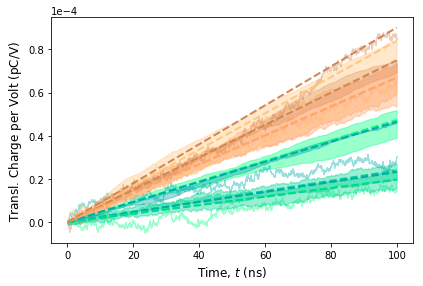

In [219]:
def func(x, a, b):
    return a * x + b
#figure(figsize=(4,3))
label = [ '-1000mV','-200mV','-100mV' ]
norm = [-1.0,-0.2,-0.1,0.1,0.2,1.0]
nline  = 3*[None]
pline  = 3*[None]
conductance={}
for j,datum in enumerate([minus1000,minus200,minus100]):
    i = j/6.0; i = 1-i

    x,_,_,y = mean(array(datum),axis=0).T
    _,_,_,dy = std(array(datum),axis=0).T
    
    #slope, intercept, r_value, p_value, std_err = linregress(x,y)
    if any(dy==zeros(len(dy))):
        sigma=ones(len(dy))
    else:
        sigma=dy
    popt, pcov = curve_fit(func, x, y,sigma=sigma)
    slope = popt[0]
    conductance[label[j]]={"neg":[slope,sqrt(pcov.diagonal())[0]],"pos": None}
    nline[j], = plot(x/1000,-x*slope,"--",lw=2,color=winter(i),label='V = '+label[j])

    #plot(x,y,color=winter(i))
    fill_between(x/1000,y1=-y+dy, y2=-y-dy,alpha=0.4,color=winter(i))

    
    
label2=['100mV','200mV','1000mV']
for j,datum in enumerate([plus100,plus200,plus1000]):
    i = j/6.0; i = 1-i

    x,_,y,_ = mean(array(datum),axis=0).T
    _,_,dy,_ = std(array(datum),axis=0).T
    
    if any(dy==zeros(len(dy))):
        sigma=ones(len(dy))
    else:
        sigma=dy
    popt, pcov = curve_fit(func, x, y,sigma=sigma)
    slope = popt[0]
    conductance[label2[j]]={"pos":[slope,sqrt(pcov.diagonal())[0]],"neg": None}
    pline[j], = plot(x/1000,-x*slope,"--",lw=2,color=copper(i),label='V = '+label2[j])

    #plot(x,y,color=winter(i))
    fill_between(x/1000,y1=-y+dy, y2=-y-dy,alpha=0.4,color=copper(i))
xlabel(r'Time, $t$ ($\mathrm{ns}$)',fontsize=5)
tight_layout()

box = gca().get_position()



#axes[2].legend(array(roi3)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
ax=gca()    
ax.ticklabel_format(style="scientific",axis="y")
ax.yaxis.major.formatter.set_powerlimits((0,0)) 
xlabel(r'Time, $t$ ($\mathrm{ns}$)',fontsize=14)
ylabel(r'Transl. Charge per Volt ($\mathrm{pC}/ \mathrm{V})$',fontsize=14);
#ylim(-8e-5,2e-5);


#figure(figsize=(4,3))
label = [ '100mV','200mV','1000mV' ]
norm = [-1.0,-0.2,-0.1,0.1,0.2,1.0]
nline  = 3*[None]
pline  = 3*[None]

for j,datum in enumerate([plus100,plus200,plus1000]):
    i = j/6.0; i = 1-i

    x,_,_,y = mean(array(datum),axis=0).T
    _,_,_,dy = std(array(datum),axis=0).T
    if any(dy==zeros(len(dy))):
        sigma=ones(len(dy))
    else:
        sigma=dy
    popt, pcov = curve_fit(func, x, y,sigma=sigma)
    slope = popt[0]
    conductance[label[j]].update({"neg":[slope,sqrt(pcov.diagonal())[0]]})
    nline[j], = plot(x/1000,x*slope,"--",lw=2,color=winter(i),label='V = '+label[j])

    #plot(x,y,color=winter(i))
    fill_between(x/1000,y1=y+dy, y2=y-dy,alpha=0.4,color=winter(i))

    
    
    
label2=['-1000mV','-200mV','-100mV'] 
for j,datum in enumerate([minus1000,minus200,minus100]):
    i = j/6.0; i = 1-i

    x,_,y,_ = mean(array(datum),axis=0).T
    _,_,dy,_ = std(array(datum),axis=0).T
    if any(dy==zeros(len(dy))):
        sigma=ones(len(dy))
    else:
        sigma=dy
    popt, pcov = curve_fit(func, x, y,sigma=sigma)
    slope = popt[0]
    conductance[label2[j]]={"pos":[slope,sqrt(pcov.diagonal())[0]]}
    pline[j], = plot(x/1000,x*slope,"--",lw=2,color=copper(i),label='V = '+label2[j])

    #plot(x,y,color=winter(i))
    fill_between(x/1000,y1=y+dy, y2=y-dy,alpha=0.4,color=copper(i))
xlabel(r'Time, $t$ ($\mathrm{ns}$)',fontsize=5)
tight_layout()

xlabel(r'Time, $t$ ($\mathrm{ns}$)',fontsize=12)
ylabel(r'Transl. Charge per Volt ($\mathrm{pC}/ \mathrm{V})$',fontsize=12);
#ylim(-8e-5,2e-5);
#savefig("going_forward.pdf")

In [172]:
any(dy==zeros(len(dy)))

True

In [14]:
glob('./md-electric-field-data/*/*/*q.out')

['./md-electric-field-data/200mV/minus-200mV/100ns-q.out',
 './md-electric-field-data/200mV/minus-200mV/300ns-q.out',
 './md-electric-field-data/200mV/minus-200mV/200ns-q.out',
 './md-electric-field-data/200mV/minus-200mV/500ns-q.out',
 './md-electric-field-data/200mV/minus-200mV/400ns-q.out',
 './md-electric-field-data/200mV/minus-200mV/600ns-q.out',
 './md-electric-field-data/200mV/plus-200mV/100ns-q.out',
 './md-electric-field-data/200mV/plus-200mV/300ns-q.out',
 './md-electric-field-data/200mV/plus-200mV/200ns-q.out',
 './md-electric-field-data/200mV/plus-200mV/500ns-q.out',
 './md-electric-field-data/200mV/plus-200mV/400ns-q.out',
 './md-electric-field-data/200mV/plus-200mV/600ns-q.out',
 './md-electric-field-data/100mV/plus-100mV/100ns-q.out',
 './md-electric-field-data/100mV/minus-100mV/100ns-q.out',
 './md-electric-field-data/1000mV/minus-1000mV/100ns-q.out',
 './md-electric-field-data/1000mV/minus-1000mV/300ns-q.out',
 './md-electric-field-data/1000mV/minus-1000mV/200ns-q.out'

In [225]:
d=array([2.22,1.47,2.32,3.64,3.40,3.70])
set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(d/(95/62))

[1.45 0.96 1.51 2.38 2.22 2.41]
